In [1]:
import tensorflow.keras as keras
import pandas as pd

train_df = pd.read_csv("csv/train.csv")
valid_df = pd.read_csv("csv/valid.csv")

y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

x_train = train_df.values
x_valid = valid_df.values

num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

x_train = x_train / 255
x_valid = x_valid / 255

x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=False, )

In [10]:
import matplotlib.pyplot as plt
import numpy as np

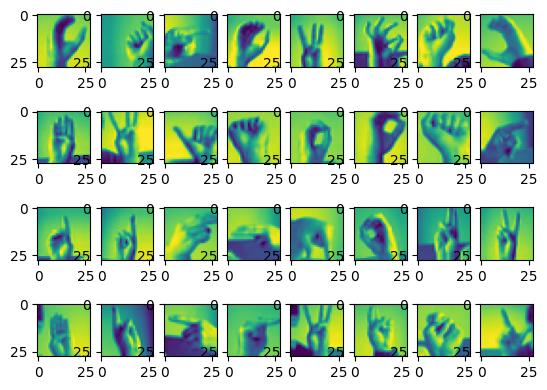

In [15]:

batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [16]:
datagen.fit(x_train)

In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)//batch_size,
          validation_data=(x_valid, y_valid))

Epoch 1/20
  8/857 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.0721 - loss: 4.0792

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


857/857 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.4508 - loss: 1.8188 - val_accuracy: 0.8419 - val_loss: 0.4427
Epoch 2/20
  1/857 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.7812 - loss: 0.7160

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7812 - loss: 0.7160 - val_accuracy: 0.7939 - val_loss: 0.5731
Epoch 3/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.8790 - loss: 0.3509 - val_accuracy: 0.9465 - val_loss: 0.1602
Epoch 4/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8750 - loss: 0.2084 - val_accuracy: 0.9271 - val_loss: 0.2114
Epoch 5/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9294 - loss: 0.2050 - val_accuracy: 0.7953 - val_loss: 0.6482
Epoch 6/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 1.0000 - loss: 0.0483 - val_accuracy: 0.8443 - val_loss: 0.4898
Epoch 7/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9528 - loss: 0.1479 - val_accuracy: 0.9508 - val_loss: 0.1345
Epoch 8/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.9062 - loss: 0.1665 - val_accuracy: 0.8476 - val_loss: 0.4654
Epoch 9/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9581 - loss: 0.1292 - val_accuracy: 0

In [25]:
model.export('asl_model')

INFO:tensorflow:Assets written to: asl_model\assets


INFO:tensorflow:Assets written to: asl_model\assets


Saved artifact at 'asl_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 24), dtype=tf.float32, name=None)
Captures:
  2456933571408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933574672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933567760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933574480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933575056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933574096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933575824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933578128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933578512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933578320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2456933578704: TensorSpec(shape=(), dtype=

In [26]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 